In [1]:
import pandas as pd

# 从URL导入数据
url = "https://storage.googleapis.com/dft-statistics/road-traffic/downloads/rawcount/region_id/dft_rawcount_region_id_3.csv"
data = pd.read_csv(url)

# 查看前几行数据以确保成功加载
print(data.head())

   count_point_id direction_of_travel  year  count_date  hour  region_id  \
0              62                   E  2021  2021-09-15     7          3   
1              62                   E  2021  2021-09-15     8          3   
2              62                   E  2021  2021-09-15     9          3   
3              62                   E  2021  2021-09-15    10          3   
4              62                   E  2021  2021-09-15    11          3   

  region_name  local_authority_id local_authority_name road_name  ...  \
0    Scotland                   4    North Lanarkshire       M80  ...   
1    Scotland                   4    North Lanarkshire       M80  ...   
2    Scotland                   4    North Lanarkshire       M80  ...   
3    Scotland                   4    North Lanarkshire       M80  ...   
4    Scotland                   4    North Lanarkshire       M80  ...   

  buses_and_coaches lgvs hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
0                 1  707               

/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_5746/121513045.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [2]:
# 查看数据的基本信息
print(data.info())

# 查看各列的名称
print(data.columns)

# 选择必要的列
selected_columns = ['year', 'hour', 'road_type', 'pedal_cycles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']
data = data[selected_columns]

# 检查缺失值
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306096 entries, 0 to 306095
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                306096 non-null  int64  
 1   direction_of_travel           306096 non-null  object 
 2   year                          306096 non-null  int64  
 3   count_date                    306096 non-null  object 
 4   hour                          306096 non-null  int64  
 5   region_id                     306096 non-null  int64  
 6   region_name                   306096 non-null  object 
 7   local_authority_id            306096 non-null  int64  
 8   local_authority_name          306096 non-null  object 
 9   road_name                     306096 non-null  object 
 10  road_type                     306096 non-null  object 
 11  start_junction_road_name      141816 non-null  object 
 12  end_junction_road_name        141816 non-nul

In [3]:
# 移除缺失值（假设缺失值不多，可以直接删除）
data = data.dropna()

# 进一步筛选有效年份（假设我们从2010年开始分析）
data = data[data['year'] >= 2010]

# 创建“机动车总数”列（不包括自行车）
data['all_motor_vehicles'] = data['cars_and_taxis'] + data['buses_and_coaches'] + data['lgvs'] + data['all_hgvs']

# 检查处理后的数据
print(data.head())


   year  hour road_type  pedal_cycles  cars_and_taxis  buses_and_coaches  \
0  2021     7     Major             0            1741                  1   
1  2021     8     Major             0            1663                  1   
2  2021     9     Major             0            1178                  6   
3  2021    10     Major             0            1214                  4   
4  2021    11     Major             0            1367                  2   

   lgvs  all_hgvs  all_motor_vehicles  
0   707       288                2737  
1   596       310                2570  
2   453       314                1951  
3   354       280                1852  
4   330       237                1936  


In [6]:
# 仅筛选五种指定道路类型的数据
data = data[data['road_type'].isin(['M', 'A', 'B', 'C', 'U'])]

# 按年和道路类型进行聚合分析
annual_road_vehicle_distribution = data.groupby(['year', 'road_type']).agg({
    'pedal_cycles': 'mean',
    'cars_and_taxis': 'mean',
    'buses_and_coaches': 'mean',
    'lgvs': 'mean',
    'all_hgvs': 'mean',
    'all_motor_vehicles': 'mean'
}).reset_index()

# 按小时和道路类型进行聚合分析
hourly_distribution = data.groupby(['hour', 'road_type']).agg({
    'pedal_cycles': 'mean',
    'cars_and_taxis': 'mean',
    'buses_and_coaches': 'mean',
    'lgvs': 'mean',
    'all_hgvs': 'mean',
    'all_motor_vehicles': 'mean'
}).reset_index()



In [10]:
# 查看数据中的唯一道路类型
print(data['road_type'].unique())



[]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x1000 with 0 Axes>

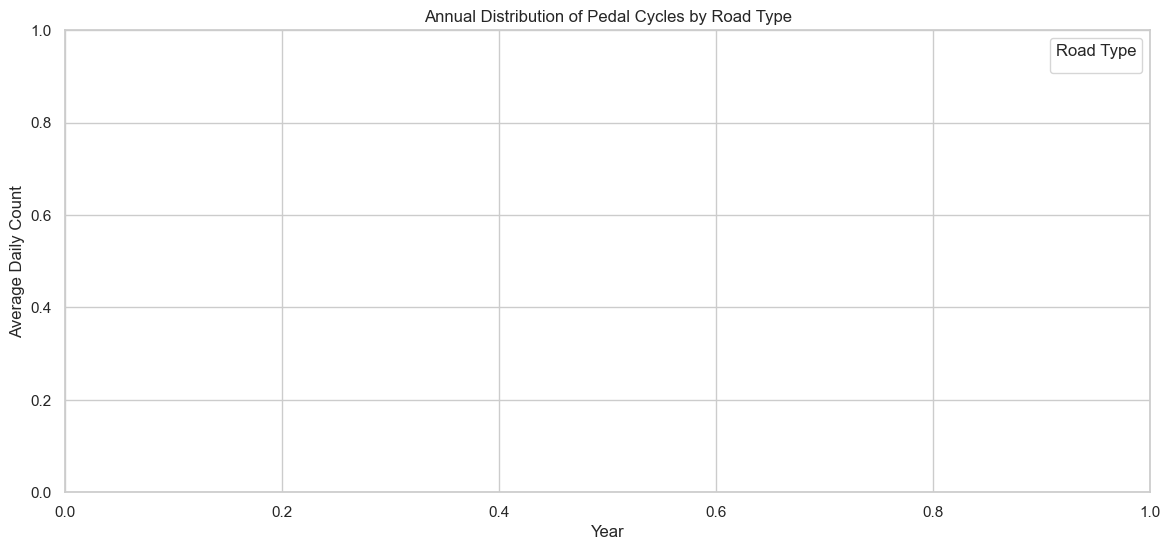

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


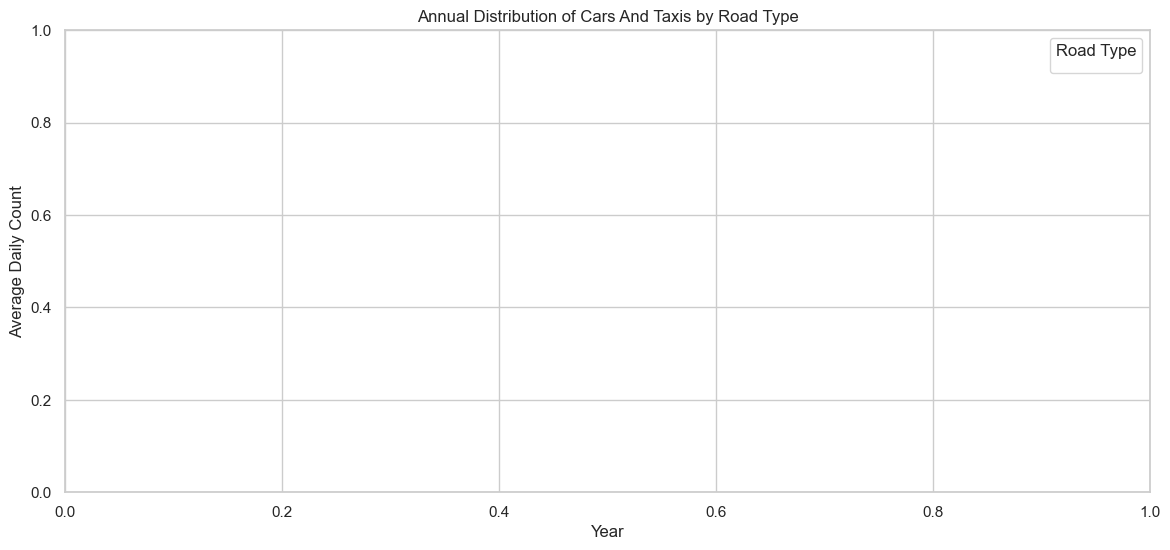

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


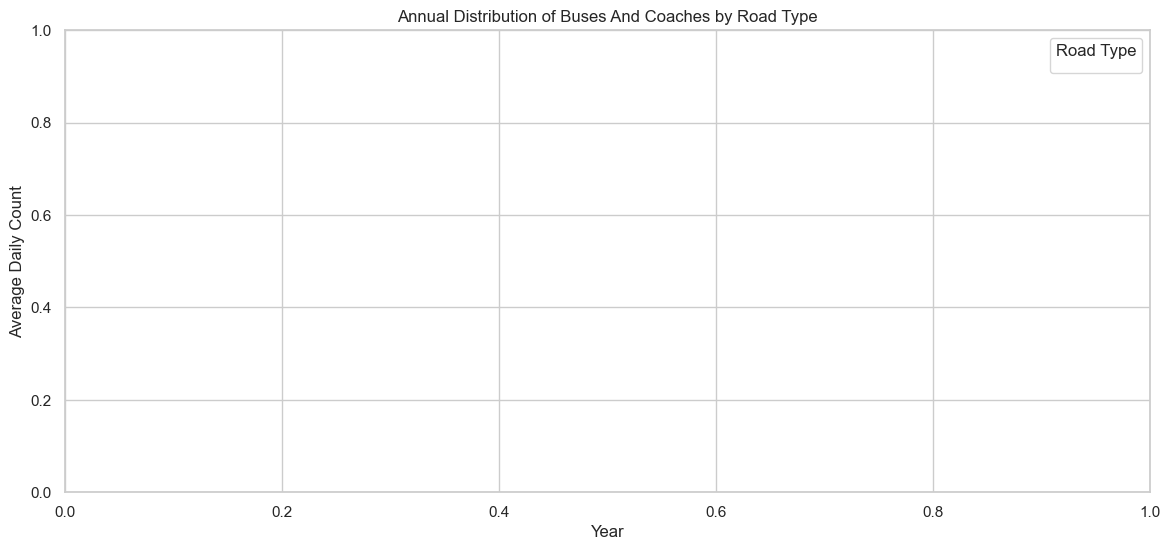

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


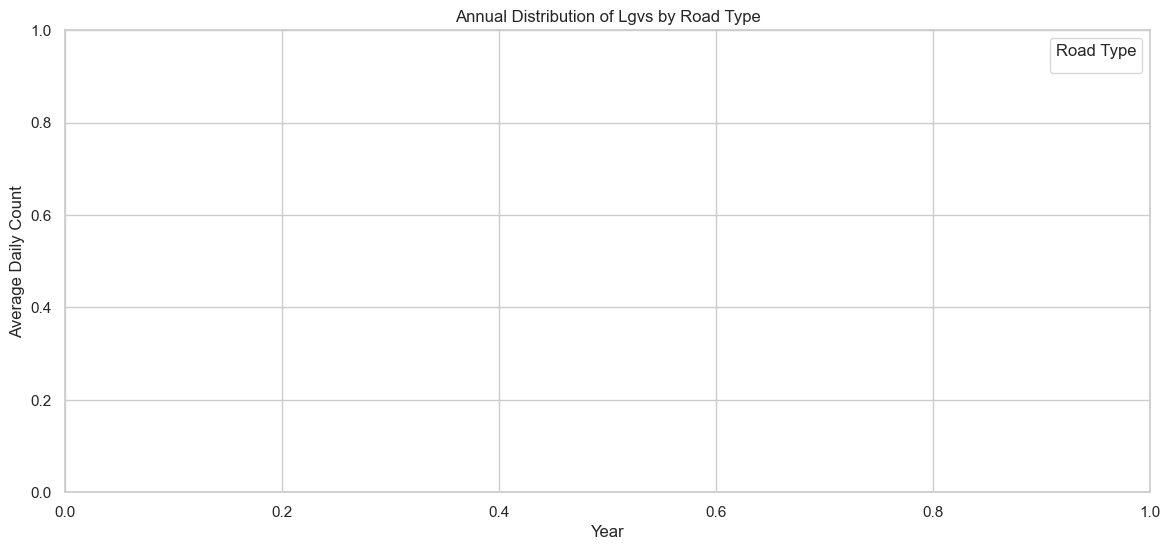

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


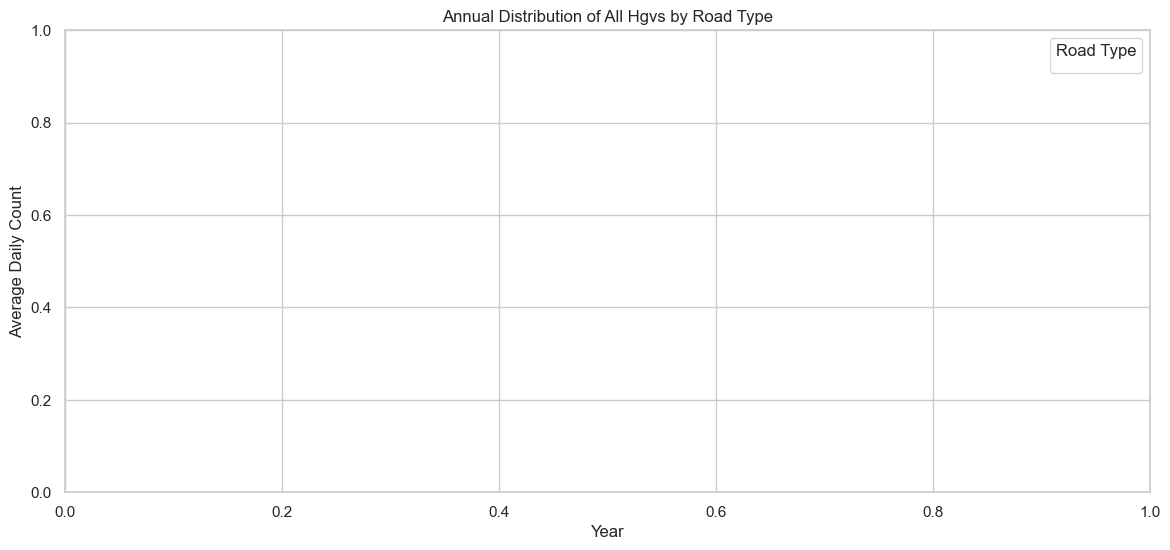

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


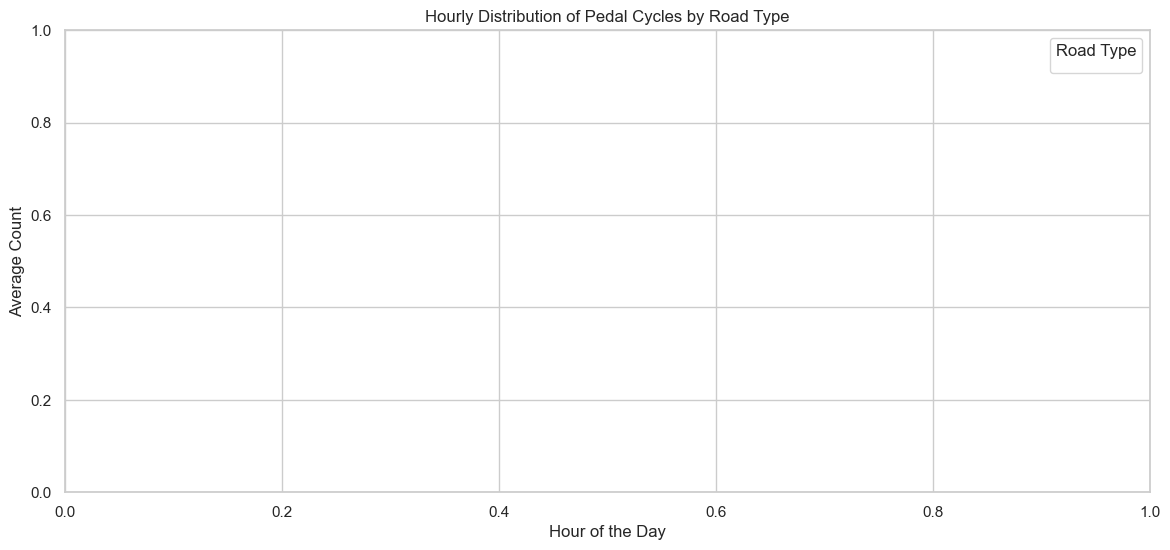

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


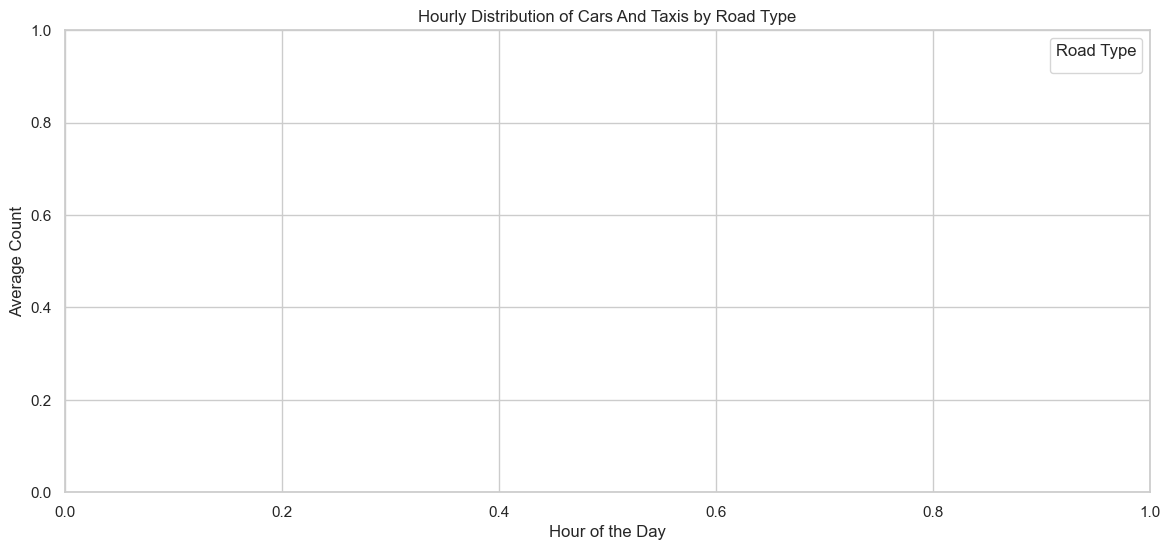

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


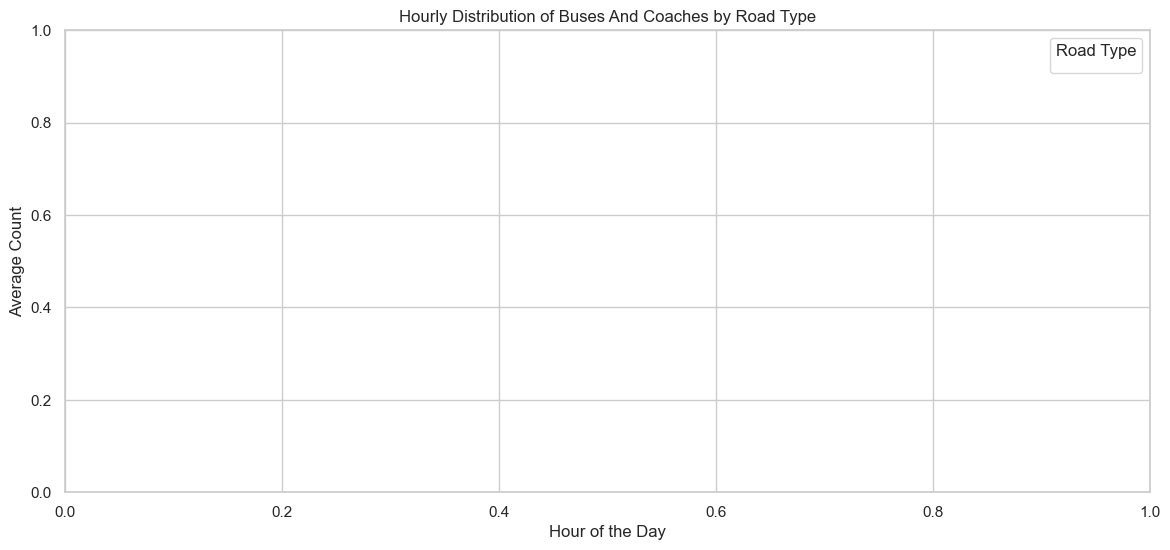

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


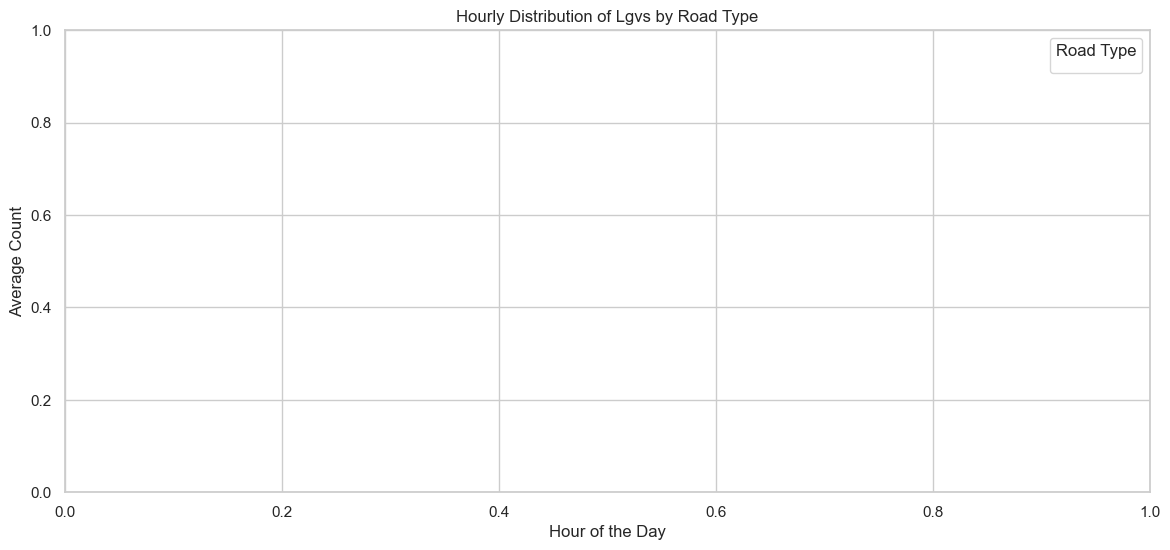

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


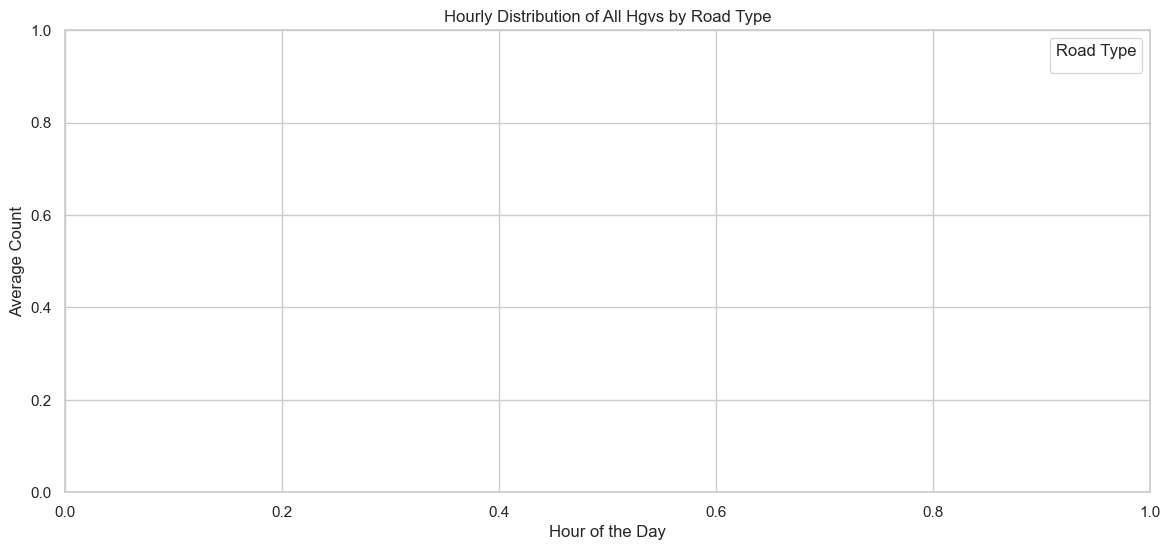

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图表样式
sns.set(style="whitegrid")

# 年度变化图表：按不同道路类型和车辆类型的分布趋势
vehicle_types = ['pedal_cycles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']

# 绘制每种车辆类型在年度和不同道路上的分布
plt.figure(figsize=(16, 10))
for vehicle in vehicle_types:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=annual_road_vehicle_distribution, x='year', y=vehicle, hue='road_type', marker="o")
    plt.title(f"Annual Distribution of {vehicle.replace('_', ' ').title()} by Road Type")
    plt.xlabel("Year")
    plt.ylabel("Average Daily Count")
    plt.legend(title="Road Type")
    plt.show()

# 日内分布图表：按不同道路类型和车辆类型的日内分布
for vehicle in vehicle_types:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=hourly_distribution, x='hour', y=vehicle, hue='road_type', marker="o")
    plt.title(f"Hourly Distribution of {vehicle.replace('_', ' ').title()} by Road Type")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Count")
    plt.legend(title="Road Type")
    plt.show()
